#**Analyzing Key Factors for Customer Satisfaction in the

---

Airline Industry**
Team7: Aastha Surana, Atishay Jain, Jeonghee Son, Nimisha Agarwal, Sidhant Sidhant, Xingzhu Chen

###Abstract

With the increase in competition and changing customer expectations in the airline industry, understanding factors that drive customer satisfaction is very important for airlines to remain competitive in this dynamic industry. This study analyzes airline reviews and ratings data to uncover key factors that impact customer experience. It further explores how these ratings vary by the geographic demographics and also includes a trend analysis of the type of travelers to know segments that companies could target.

### Problem Statement

In the airline industry, customer satisfaction is crucial but difficult to optimize due to evolving expectations. Many airlines have trouble figuring out what makes their customers happy, which leads to service gaps and missed chances to build loyalty. To stay competitive, airlines need to better understand what drives satisfaction and fix those service gaps with insights derived through an analysis of customer reviews.



### Executive Summary

This report analyzes customer reviews and ratings to identify the key factors driving passenger satisfaction.

**Objectives**

* **Identify Key Satisfaction Drivers:** Understand the main factors influencing customer satisfaction, including service quality, food and beverages, seat comfort, and staff behavior.

* **Analyze Segments and Trends:** Examine satisfaction levels across different segments and track changes in traveler satisfaction over time.

* **Gain Regional and Flight Type Insights:** Investigate the variations in satisfaction between international and domestic flights and across different regions.


**Findings**

* **Key Factors for Customer Satisfaction:** Value for money, along with seat comfort, cabin staff, and ground service, were identified as critical satisfaction drivers.

* **Traveler Type Trends:** Travel frequency and recommendation behavior differ significantly between solo leisure and business travelers.

* **Regional Variations in Satisfaction:** Satisfaction levels show notable differences across countries and between long-haul and short-haul flights.


**Recommendations**

* **Enhance Seat Comfort, Cabin Staff, and Ground Services:** Focusing on these factors, while ensuring value for money, is essential for improving satisfaction across all traveler types.
* **Tailor Marketing Strategies:** Develop marketing and service offerings that are targeted to specific traveler segments.
* **Improve Services in Low-Rated Regions:** Concentrate on enhancing factors in regions where satisfaction scores are lower.
* **Develop Flight-Type-Specific Strategies:** Create strategies tailored to the operational needs and customer expectations of international and domestic flights to improve perceived value.


# **1. Introduction**

###1.1. Motivation

In the competitive airline industry, understanding customer feedback is crucial for improving services and enhancing the overall passenger experience. This project analyzes customer review data to uncover trends, pain points, and factors affecting satisfaction. By using these insights, airlines can make data-driven decisions to improve services, boost customer loyalty, and stay competitive.

### 1.2. Data Source

* **Airline Review Data:** Customer reviews and ratings for international and domestic airlines ([Link](https://github.com/Juhibhojani/Airline-Reviews-))

The data we have sourced for our business problem is a comprehensive review data for various airlines across the globe. It includes string reviews, seat class and type of traveler along with numeric ratings for categorized services and factors as well as overall ratings on a 1 to 5 point scale. It includes whether the customers would recommend the same airlines to others as well.

* **World Cities Data:** City and country details with population information ([Link](https://simplemaps.com/data/world-cities))


This dataset contains cities and codes of different countries of the world. This dataset was merged with the initial dataset to map the geographical location of various flights, which had mixed data for flight routes, majorly city-wise instead of countries.

### 1.3. Data Description

**Airline Review**

Column | Description | Data Type
------ | ----------- | ---------
**Unnamed: 0** | Index Column | ``int64``
**Airline Name** | The name of the airline being reviewed | ``object``
**Overall Rating** | The overall rating given to the rating on a scale 1 to 10 | ``object``
**Review Title** | The title of the review from the customer | ``object``
**Review Date** | The date when the review was written | ``object``
**Verified** | Indicates whether the reveiw was verified as authentic | ``bool``
**Review** | The full text of the review | ``object``
**Aircraft** | The type of aircraft used during the flight | ``object``
**Type of Traveler** | The type of traveler | ``object``
**Seat Type** | The class of seat the reviewer used | ``object``
**Route** | The route flown by the reviewer | ``object``
**Date Flown** | The date when the flight took place | ``object``
**Seat Comfort** | Rating of the comfort of the seat on a scale 1 to 5 | ``float64``
**Cabin Staff Service** | Rating of the cabin staff service on a scale 1 to 5 | ``float64``
**Food & Beverages** | Rating of the Food & Beverages on a scale 1 to 5 | ``float64``
**Ground Service** | Rating of the Ground Service on a scale 1 to 5 | ``float64``
**Inflight Entertainment** | Rating of the Inflight Entertainment on a scale 1 to 5 | ``float64``
**Wifi & Connectivity** | Rating of the Wifi & Connectivity on a scale 1 to 5 | ``float64``
**Value for Money** | Rating of the perceived value for the money spent on the flight on a scale 1 to 5 | ``float64``
**Recommended** | Whether the reviewer recommends the Airline | ``object``

**World Cities**

Column | Description | Data Type
------ | ----------- | ---------
**City** | The name of the city | ``object``
**City_ascii** | The name of the city in ASCII characters | ``object``
**Lat** | The latitude coordinate of the city | ``float64``
**Lng** | The longitude coordinate of the city | ``float64``
**Country** | The name of the country where the city is located | ``object``
**iso2** | The 2-letter country code | ``object``
**iso3** | The 3-letter country code | ``object``
**admin_name** | The name of the primary administrative division of the city | ``object``
**capital** | Indicates whether the city is a capital and, if so, its type (e.g., primary, admin) | ``object``
**population** | The population of the city | ``float64``
**id** | Unique identifier for each city in the dataset | ``int64``

# **2. Data Cleaning**

### 2.1 Libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.cm as cm
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### 2.2 Data Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
airline_review = pd.read_csv("/content/drive/My Drive/BA780 - Intro to Data Analytics/Team Project B7/Airline_review 2.csv")
world_cities = pd.read_excel("/content/drive/My Drive/BA780 - Intro to Data Analytics/Team Project B7/worldcities.xlsx")

Mounted at /content/drive


### 2.3 Data Basic Information

In [ ]:
airline_review.head(3)

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no


In [ ]:
airline_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [ ]:
airline_review.describe()

,Unnamed: 0,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money
count,23171.00000,19016.000000,18911.000000,14500.000000,18378.000000,10829.000000,5920.000000,22105.000000
mean,11585.00000,2.618374,2.871609,2.553586,2.353738,2.179056,1.780405,2.451165
std,6689.03588,1.464840,1.604631,1.526314,1.595747,1.488839,1.318800,1.594155
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,5792.50000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,11585.00000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000
75%,17377.50000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,4.000000
max,23170.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
world_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [ ]:
world_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47868 entries, 0 to 47867
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        47868 non-null  object 
 1   city_ascii  47867 non-null  object 
 2   lat         47868 non-null  float64
 3   lng         47868 non-null  float64
 4   country     47868 non-null  object 
 5   iso2        47835 non-null  object 
 6   iso3        47868 non-null  object 
 7   admin_name  47671 non-null  object 
 8   capital     13023 non-null  object 
 9   population  47656 non-null  float64
 10  id          47868 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.0+ MB


### 2.4 Data Cleaning

To merge the two datasets (airline_review and world_cities), we will clean the world_cities dataset to prepare it for use. Our goal is to align the 'city_ascii' column from world_cities with the city names in the 'route' column of the airline_review dataset.

To start, we will begin by checking for any missing values in the 'city_ascii' column.

In [ ]:
world_cities['city_ascii'].isnull().sum()

1

We will fill the missing value with the corresponding value from the 'city' column and convert the values to lowercase strings for consistency.
Also, we will drop the columns that are not needed in the dataset, as well as any rows with missing values in the 'population' column.

In [ ]:
#Fill missing values of 'city_ascii'
world_cities['city_ascii'].fillna(world_cities['city'].str.lower(), inplace = True)

#Drop columns
world_cities.drop(columns = ['city', 'iso2', 'iso3', 'admin_name', 'capital', 'id'], inplace = True)

#Drop rows that have missing values in 'population column
world_cities.dropna(subset = ['population'], inplace = True)

<ipython-input-10-2e6d26b28ff0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  world_cities['city_ascii'].fillna(world_cities['city'].str.lower(), inplace = True)


Before merging the two datasets, we will check for duplicates in the 'city_ascii' column to prevent the number of rows from increasing unexpectedly during the merge.

In [ ]:
world_cities['city_ascii'].duplicated().sum()

3692

Since there are 3,692 duplicate city names, we decided to use only the city with the highest population for each duplicate.

In [ ]:
world_cities = world_cities.loc[world_cities.groupby('city_ascii')['population'].idxmax()]

For the 'airline_review' dataset, we will rename the columns to ensure consistent formatting.

In [ ]:
airline_review = airline_review.rename(columns={'Unnamed: 0' : 'index', 'Airline Name' : 'airline_name', 'Overall_Rating' : 'overall_rating',
                                                'Review_Title' : 'review_title', 'Review Date' : 'review_date', 'Verified' : 'verified',
                                                'Review' : 'review', 'Aircraft' : 'aircraft', 'Type Of Traveller' : 'type_of_traveler',
                                                'Seat Type' : 'seat_type', 'Route' : 'route', 'Date Flown' : 'date_flown', 'Seat Comfort' : 'seat_comfort',
                                                'Cabin Staff Service' : 'cabin_staff_service', 'Food & Beverages' : 'food_and_beverages',
                                                'Ground Service' : 'ground_service', 'Inflight Entertainment' : 'inflight_entertainment',
                                                'Wifi & Connectivity' : 'wifi_and_connectivity', 'Value For Money' : 'value_for_money',
                                                'Recommended' : 'recommended'})

To merge with the 'world_cities' dataset, we will split the 'route' column into departure and arrival cities. Since the 'route' column is in various formats, we will split it based on both 'to' and 'via'. The formats include:

* A to B
* A to B via C
* A via B to C

In [ ]:
#Drop missing values in 'route' column
airline_review.dropna(subset = ['route'], inplace = True)

#Seperate Columns (route columns - departure / arrival)
route_split = airline_review['route'].str.split(' to ', expand = True)
airline_review['departure'] = route_split[0]
airline_review['arrival'] = route_split[1]

#Cleaning Exceptions in Route (ex. A to B via C, A via B to C)
airline_review['departure'] = airline_review['departure'].str.split('via', expand = True)[0]
airline_review['arrival'] = airline_review['arrival'].str.split('via', expand = True)[0]

#Drop 'route' column
airline_review.drop(columns=['route'], inplace = True)

#Make city names in both data sets to lowercase and remove any spaces
airline_review['departure'] = airline_review['departure'].str.lower().str.strip()
airline_review['arrival'] = airline_review['arrival'].str.lower().str.strip()
airline_review['departure'] = airline_review['departure'].str.lower().str.strip('"')
airline_review['arrival'] = airline_review['arrival'].str.lower().str.strip('"')
airline_review['departure'] = airline_review['departure'].str.lower().str.strip('=')
airline_review['arrival'] = airline_review['arrival'].str.lower().str.strip('=')
world_cities['city_ascii'] = world_cities['city_ascii'].str.lower().str.strip()

 Now, we will merge the datasets twice as follows:

*   'city_ascii' with 'departure'
*   'city_ascii' with 'arrival'

In [ ]:
#Merge both data frames to get the information for departure country
merge_departure = pd.merge(airline_review, world_cities, left_on = 'departure', right_on = 'city_ascii', how = 'left')
merge_departure = merge_departure.rename(columns={"city_ascii":"departure_city_ascii", "lat":"departure_lat", "lng":"departure_lng","country":"departure_country", "population":"departure_population"})

#Merge both data frames to get the information for arrival country
airline_review_final = pd.merge(merge_departure, world_cities, left_on = 'arrival', right_on = 'city_ascii', how = 'left')
airline_review_final = airline_review_final.rename(columns={"city_ascii":"arrival_city_ascii", "lat":"arrival_lat", "lng":"arrival_lng","country":"arrival_country", "population":"arrival_population"})

Now that we have the final merged dataset, we will visualize the values before cleaning it accordingly.

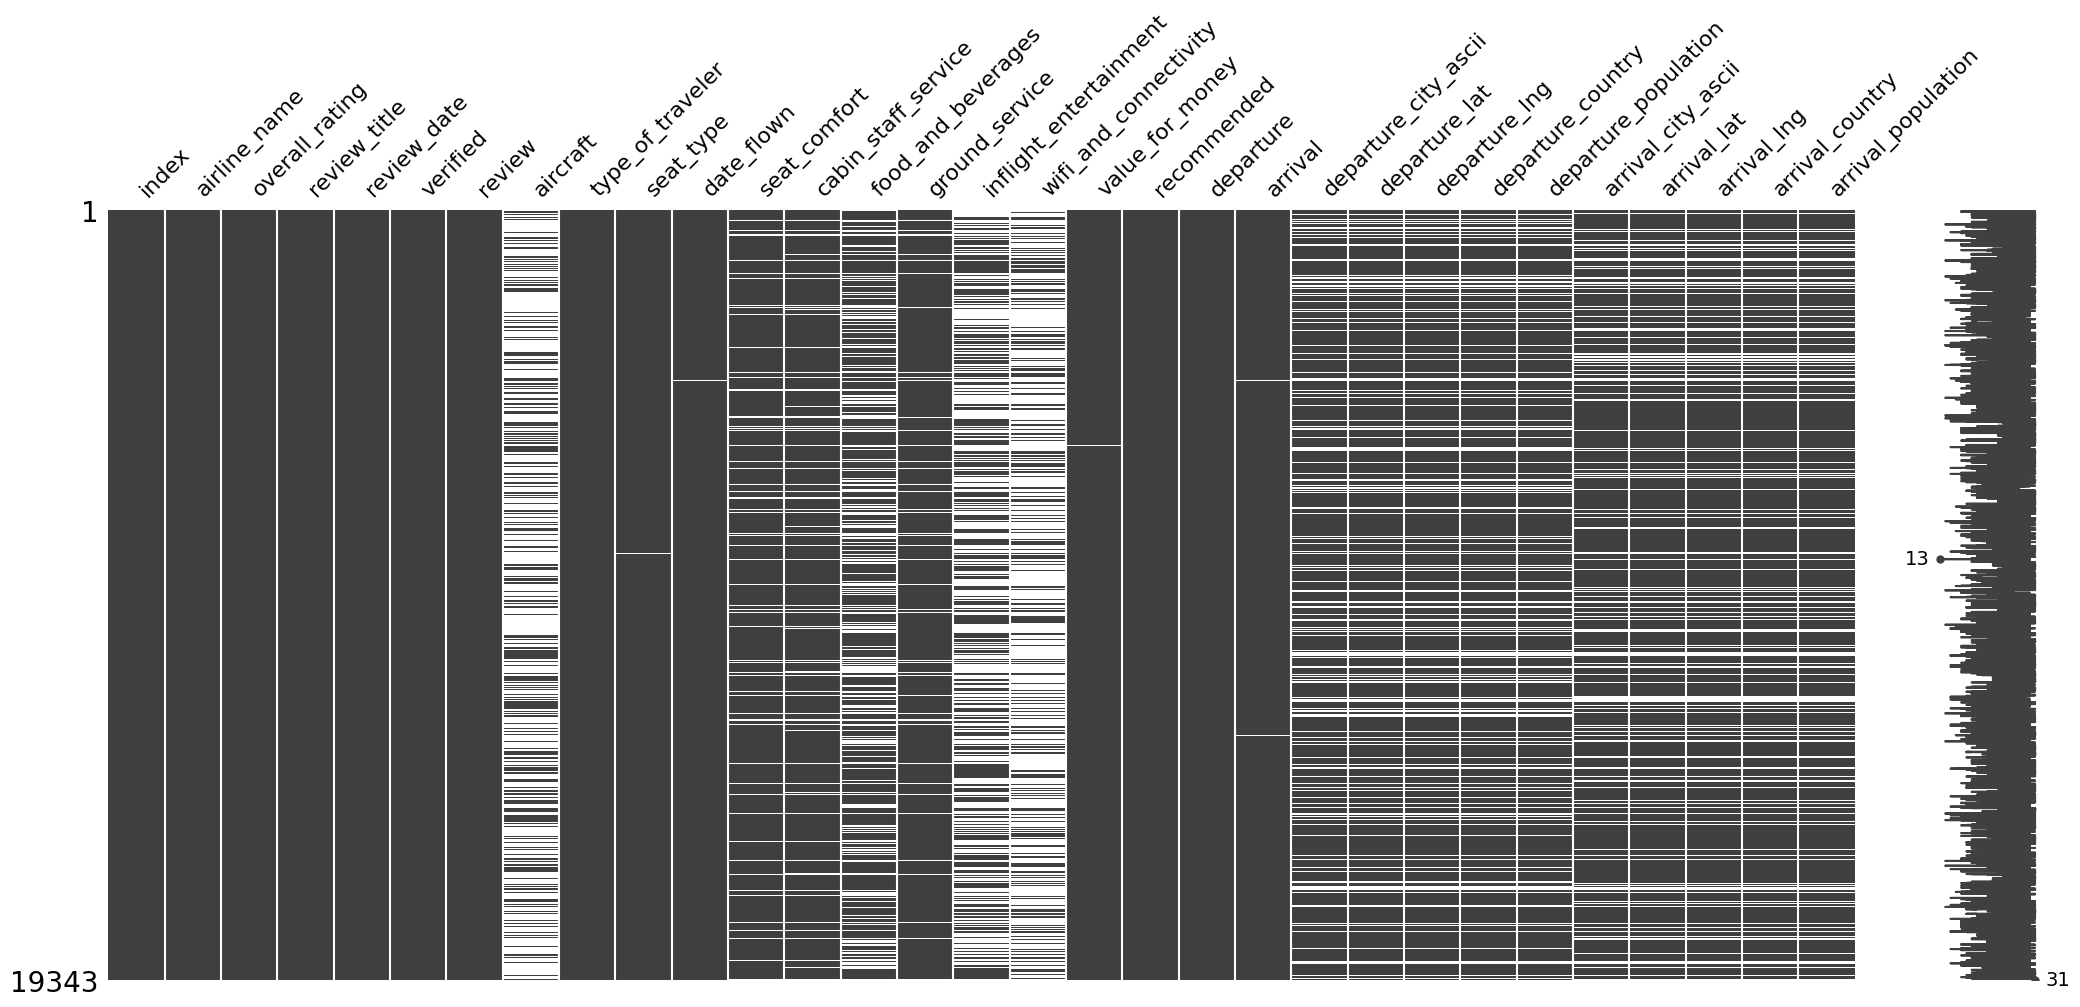

In [ ]:
#Visualizing how many rows have missing values
msno.matrix(airline_review_final)
plt.show()

Afterward, we proceeded with data cleaning by removing unnecessary rows and columns, adding additional columns for analysis, and standardizing the data format.

*Notably, the columns from 'seat_comfort' to 'value_for_money' had many missing values. However, since these columns contain ratings between 1 and 5, we decided to leave the missing values as they won't be used in the analysis.

In [ ]:
#Drop Columns
airline_review_final.drop(columns=['index', 'aircraft'], inplace = True)

#Drop False values of the verified Column
airline_review_final = airline_review_final.loc[airline_review_final['verified'] == True]

#Date Format
airline_review_final['review_date'] = airline_review_final['review_date'].str.replace(r'(\d+)(th|st|nd|rd)', r'\1', regex=True)
airline_review_final['review_date'] = pd.to_datetime(airline_review_final['review_date'], format='%d %B %Y')
airline_review_final['date_flown'] = pd.to_datetime(airline_review_final['date_flown'], format='%B %Y')

#Add Flight Type (Domestic / International) column based on Arrival and Departure country
airline_review_final = airline_review_final[airline_review_final['departure_country'].notnull() & airline_review_final['arrival_country'].notnull()]
airline_review_final['flight'] = np.where(airline_review_final['departure_country'] == airline_review_final['arrival_country'], 'domestic', 'international')

<ipython-input-17-9bf7ac1e4aae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_review_final['review_date'] = airline_review_final['review_date'].str.replace(r'(\d+)(th|st|nd|rd)', r'\1', regex=True)
<ipython-input-17-9bf7ac1e4aae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airline_review_final['review_date'] = pd.to_datetime(airline_review_final['review_date'], format='%d %B %Y')
<ipython-input-17-9bf7ac1e4aae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

# **3. Exploratory Data Analysis**

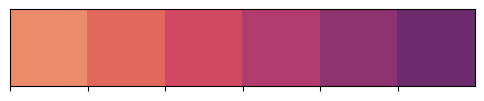

In [ ]:
color_palette = sns.color_palette("flare")
colors = ['#e98d6b', '#e3685c', '#d24961', '#b13c6c', '#8f3370', '#6c2b6d']
sns.palplot(color_palette)

## 3.1 Key Driver Analysis

Firstly, we want to understand the score distribution for each performance criteria using box plots.

<ipython-input-19-73fcc9387f2a>:6: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=airline_review_final[performance_columns],palette=['#b13c6c'])


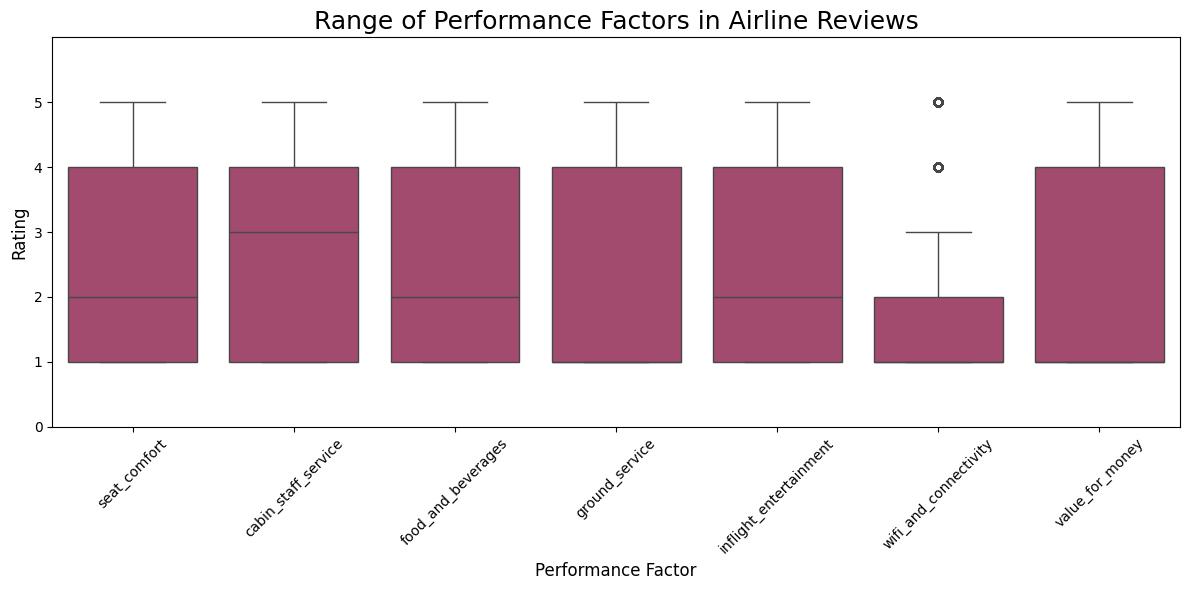

In [ ]:
#Defining Performance Columns in a List
performance_columns = ['seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'ground_service', 'inflight_entertainment', 'wifi_and_connectivity', 'value_for_money']

#Visualizing a Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=airline_review_final[performance_columns],palette=['#b13c6c'])
plt.title('Range of Performance Factors in Airline Reviews', fontsize=18)
plt.xticks(rotation=45)
plt.xlabel('Performance Factor', fontsize = 12)
plt.ylabel('Rating', fontsize = 12)
plt.ylim(0,6)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.tight_layout()
plt.show()

**The box plot shows that:**

* Most performance parameters show a similar distribution, possibly indicating that passengers' experience with one factor may influence their ratings of others.

* The IQR of the wifi & connectivity is much narrower, showing a low concentration of high ratings compared to other factors, with just a few outliers above the mid-scale range.

* The median values show a low rating for all performance drivers, except cabin staff services. Specifically, ground service, wifi and connectivity, and value for money each have a median rating of 1.

Now that we understand the differences in performance factors, we will set thresholds based on the overall rating to classify them, identifying the top performers and areas needing improvement. We will then group these to determine which areas require the most and least work.

In [ ]:
#Defining a function to categorize performers(ratings>=4) and defectors(0<ratings<=2)
def performance_category(value):
      if value >= 4:
        return 'Performer'
      elif value <= 2 and value > 0:
        return 'Defector'
      else:
        return 'Neutral'

#applying the performance_category function to each performance column
for col in performance_columns:
    airline_review_final.loc[:,col + '_category'] = airline_review_final[col].apply(performance_category)

#counting total performers and defectors for each performance category
performer_count = airline_review_final[[col + '_category' for col in performance_columns]].apply(lambda x: (x == 'Performer').sum())
defector_count = airline_review_final[[col + '_category' for col in performance_columns]].apply(lambda x: (x == 'Defector').sum())

#identifying areas that need more work (most defectors) and least work (most performers)
area_needing_more_work = defector_count.idxmax()
area_needing_least_work = performer_count.idxmax()

print(f"Area Needing Least Work (Most Performers): {area_needing_least_work.replace('_category', '')}")
print(f"Area Needing Most Work (Most Defectors): {area_needing_more_work.replace('_category', '')}")

Area Needing Least Work (Most Performers): cabin_staff_service
Area Needing Most Work (Most Defectors): value_for_money


To dive deeper and further identify patterns in key drivers of customer satisfaction, we explored the columns to uncover the correlation between 'overall_rating' and performance factors.

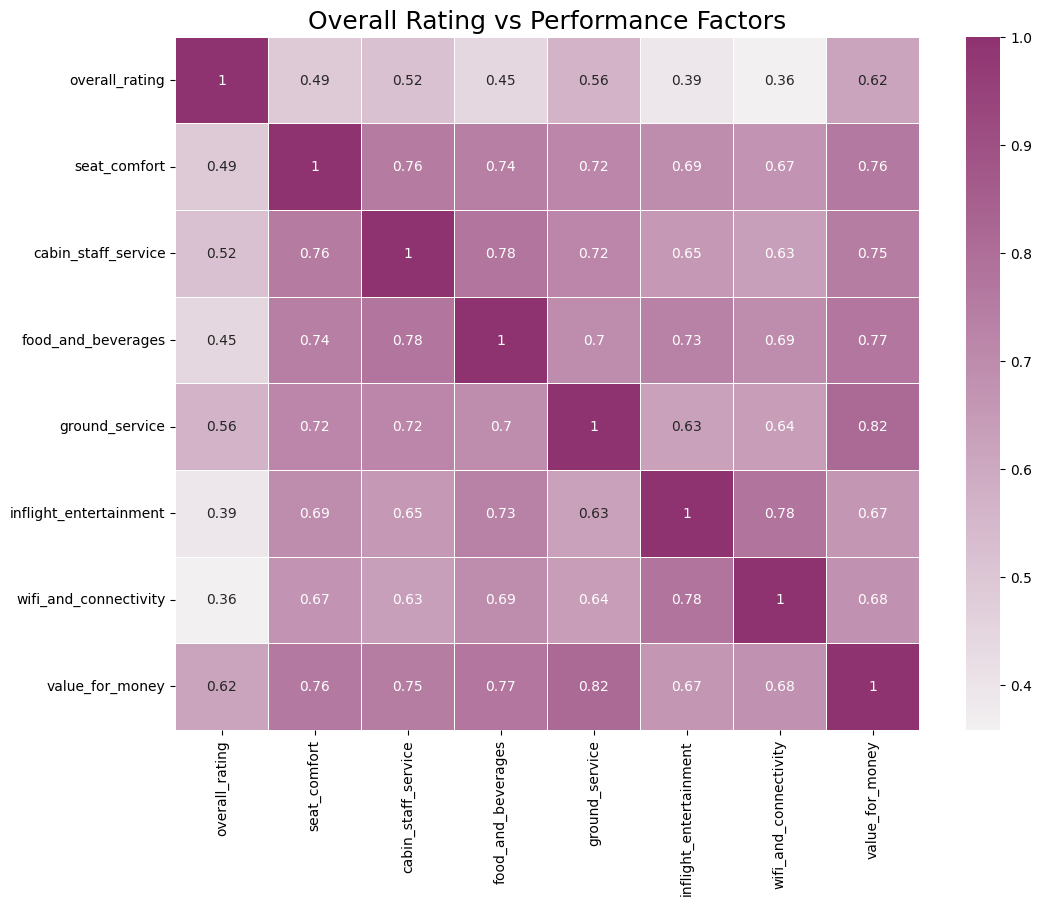

In [ ]:
#Defining a variable that contains performance columns and 'overall_rating'
overall_performance_columns = ['overall_rating', 'seat_comfort', 'cabin_staff_service', 'food_and_beverages', 'ground_service', 'inflight_entertainment', 'wifi_and_connectivity', 'value_for_money']

#Calculating the correlation matrix
correlation = airline_review_final[overall_performance_columns]
correlation_matrix = correlation.corr()

#Set cmap
custom_cmap = sns.light_palette('#8F3370', as_cmap=True)

#Visualization
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot = True, cmap = custom_cmap, linewidths = 0.5)
plt.title('Overall Rating vs Performance Factors', fontsize = 18)
plt.show()

**From the heatmap, we were able to discover patterns as below:**

*   Factors were moderately correlated with the overall ratings, none of them displaying extreme values. They also show strong correlations with each other, which could imply holistic judgments instead of individual assessment.

*   While value for money has the highest correlation score with overall ratings, it is also is highly correlated with all comfort-related factors: ground service, food and beverages, cabin staff service and seat comfort. This highlights the importance of these factors in shaping customers' perception of value, which further influences their overall ratings.

*   Inflight entertainment and wifi & connectivity showed lower correlations with overall ratings, consistent with the initial assessment. This may be due to these services either being a source of dissatisfaction or because passengers have limited access to them.

After analyzing the performance factors across the airline industry, we now seek to examine the competitive landscape by comparing individual airlines. Our focus will be on identifying which airlines have the highest overall ratings, providing a basis for relative performance contrast. To maintain a balanced evaluation, we will include only those airlines that have met a minimum review threshold.

<ipython-input-22-da54637423eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_airlines_final['overall_rating'] = pd.to_numeric(filtered_airlines_final['overall_rating'], errors='coerce')


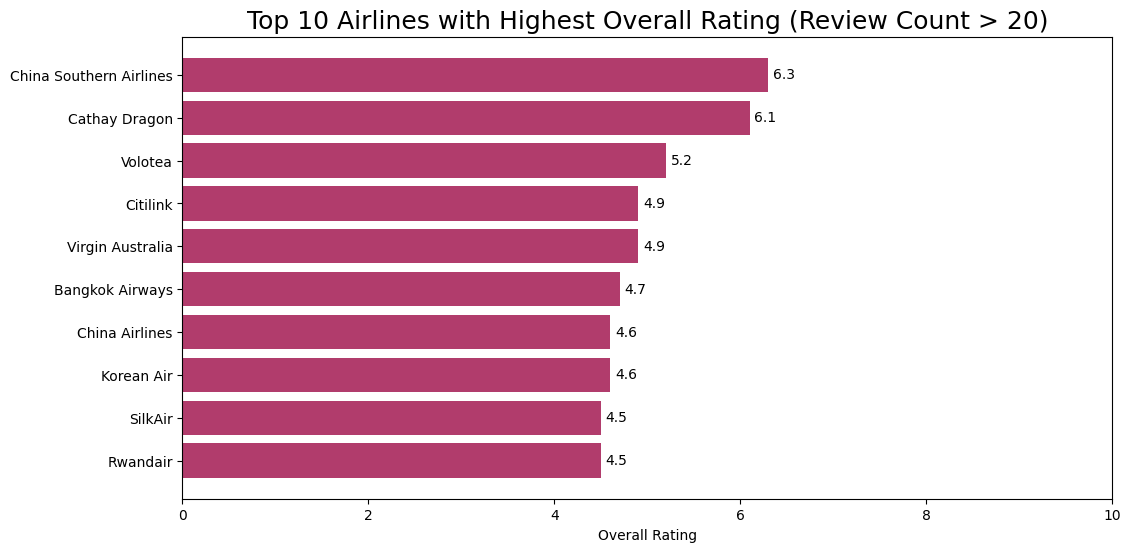

In [ ]:
#Making a group of airlines that recieved more than 20 reviews
airline_review_counts = airline_review_final.groupby('airline_name').size()
filtered_airlines = airline_review_counts[airline_review_counts > 20].index
filtered_airlines_final = airline_review_final[airline_review_final['airline_name'].isin(filtered_airlines)]

#Filter the top10 airlines with the highest average overall rating
filtered_airlines_final['overall_rating'] = pd.to_numeric(filtered_airlines_final['overall_rating'], errors='coerce')
top_10_airlines = filtered_airlines_final.groupby('airline_name')['overall_rating'].mean().round(1).sort_values(ascending=False).head(10)

#Getting the count of reviews of top10 airlines
review_counts = filtered_airlines_final.groupby('airline_name').size()
top_10_review_counts = review_counts.loc[top_10_airlines.index]

#Visualization
plt.figure(figsize=(12, 6))
bars = plt.barh(top_10_airlines.index, top_10_airlines, color='#b13c6c')

for bar, count in zip(bars, top_10_airlines):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, f'{count}', va='center')

plt.xlim(0,10)
plt.xlabel('Overall Rating')
plt.title('Top 10 Airlines with Highest Overall Rating (Review Count > 20)', fontsize = 18)
plt.gca().invert_yaxis()
plt.show()

**The bar chart indicates that:**

*  China Southern Airlines took the top spot with an overall rating of 6.3 followed by Cathay Dragon at 6.1, creating a significant gap from the third-place airline, Volotea, which dips to 5.2.

*  The other airlines that follow showed similar overall ratings, with no major differences between them ranging from 4.5 to 4.9

* Many of the airlines in the top 10 are based in Asia (e.g., China Southern, Cathay Dragon, Bangkok Airways, China Airlines, and Korean Air), suggesting that the airlines in this region may be excelling in customer satisfaction.

To gain deeper insights, let's examine how these Top 10 Airlines are performing across the individual performance factors.

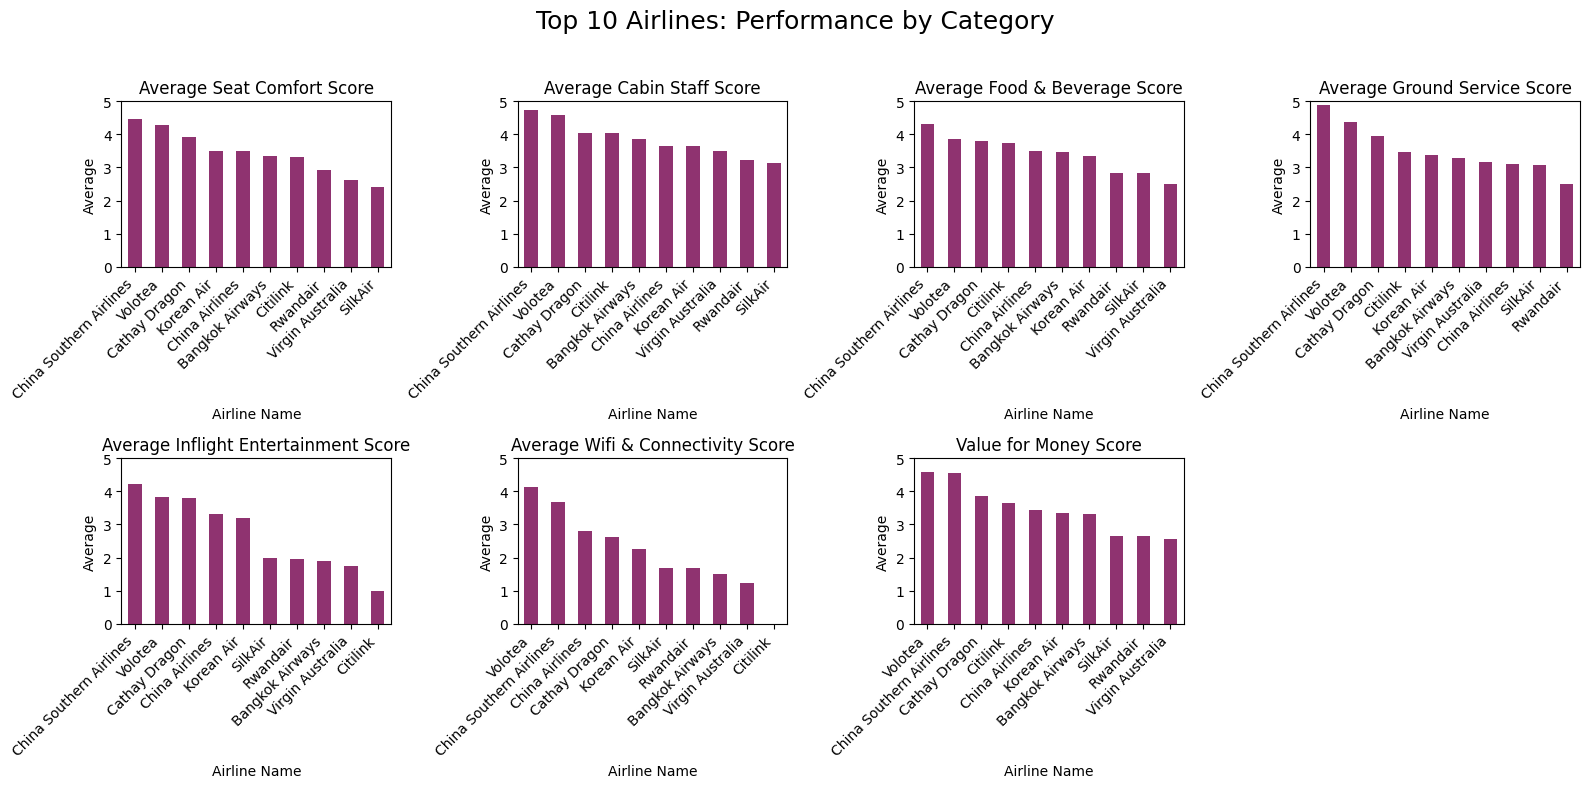

In [ ]:
#Convert performance columns to numeric values
for col in performance_columns:
    airline_review_final[col] = pd.to_numeric(airline_review_final[col], errors='coerce')

#Get the dataframe of the top 10 airlines
top_10_airlines_df = airline_review_final[airline_review_final['airline_name'].isin(top_10_airlines.index)]

#Define custom titles
custom_titles = ['Average Seat Comfort Score', 'Average Cabin Staff Score', 'Average Food & Beverage Score',
                'Average Ground Service Score', 'Average Inflight Entertainment Score', 'Average Wifi & Connectivity Score',
                'Value for Money Score']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, col in enumerate(performance_columns):
    if i >= 7:
        break

    ax = axes[i // 4, i % 4]
    avg_performance = top_10_airlines_df.groupby('airline_name')[col].mean().sort_values(ascending=False)
    bars = avg_performance.plot(kind='bar', ax=ax, color='#8f3370')
    ax.set_title(custom_titles[i])

    ax.set_xlabel('Airline Name')
    ax.set_ylabel('Average')
    ax.set_xticks(range(len(avg_performance.index)))
    ax.set_xticklabels(avg_performance.index, rotation=45, ha='right')
    ax.set_ylim(0, 5)

fig.suptitle('Top 10 Airlines: Performance by Category', fontsize=18)

fig.delaxes(axes[1, 3])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**We can observe that:**

* China Southern Airlines and Volotea both ranked in the top two across all categories, with China Southern Airlines standing out with a particularly high score in the 'Ground Service' category.

* Korean Air and China Airlines show a higher variability, with their rankings changing noticeably for different factors.

* Citilink made it into the top 10 airlines for overall rating, but scored 0 in the Wi-Fi category, probably due to not offering internet services.

We know the ratings of the given performance factors, but we are curious whether other factors that could have influenced the overall ratings. With access to customer-written review data, we aim to understand the sentiments expressed and identify the factors significant enough for customers to mention in their reviews. To investigate this further, we analyzed the 'review' column.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


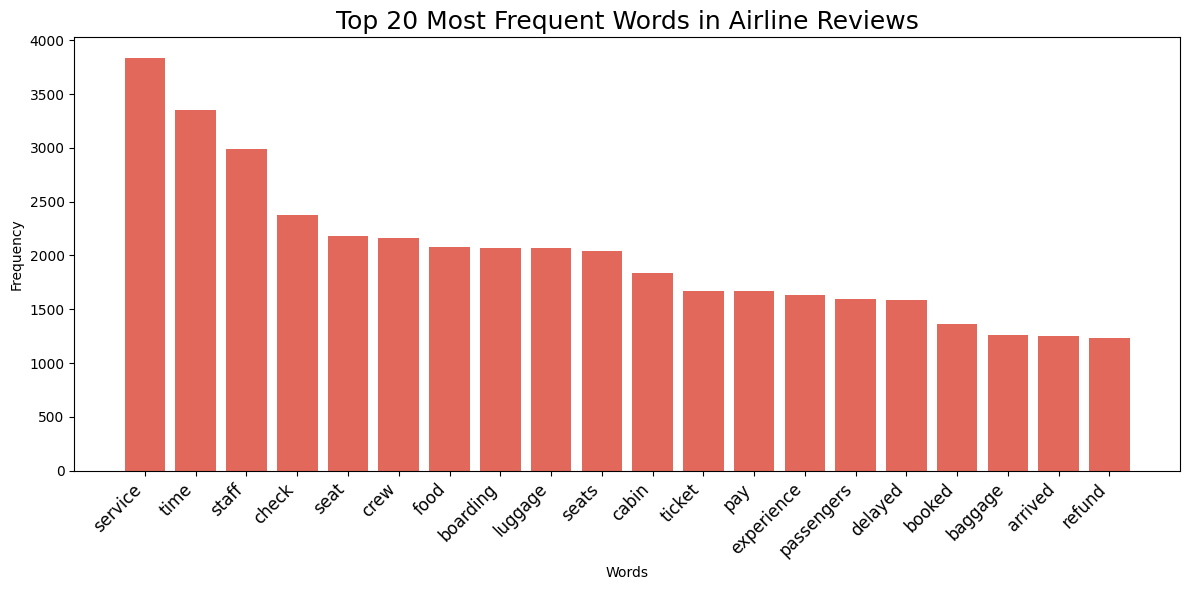

In [ ]:
#Setting stopwords for wordcloud
nltk.download('stopwords')

text = ' '.join(airline_review_final['review'])
stop_words = set(stopwords.words('english'))
custom_stopwords_substrings = ['airline', 'flight', 'plane', 'fly', 'us', 'would', 'could', 'one', 'also', 'get', 'got',
                               'even', 'able', 'given', 'told', 'called', 'people', 'said', 'called', 'hour', 'due',
                               'stil', 'air', 'never', 'back', 'first', 'another', 'asked', 'new', 'take', 'next', 'like',
                               'worst', 'extra', 'find', 'went', 'much', 'without', 'really', 'know', 'many', 'call', 'made',
                               'via', 'day', 'flew', 'well', 'put', 'go', 'two']

def contains_substring(word, substrings):
    return any(substring in word for substring in substrings)

#Frequency Analysis
tokens = text.lower().split()
tokens = [word.strip(string.punctuation) for word in tokens if word.isalpha() and word not in stop_words and not contains_substring(word, custom_stopwords_substrings)]
word_freq = Counter(tokens)
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

#Top 20 Frequent Words
top_20_words = word_freq_df.head(20)

#Chart of Word Frequency
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(top_20_words['Word'], top_20_words['Frequency'], color='#e3685c')

plt.title('Top 20 Most Frequent Words in Airline Reviews', fontsize=18)
plt.xlabel('Words', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

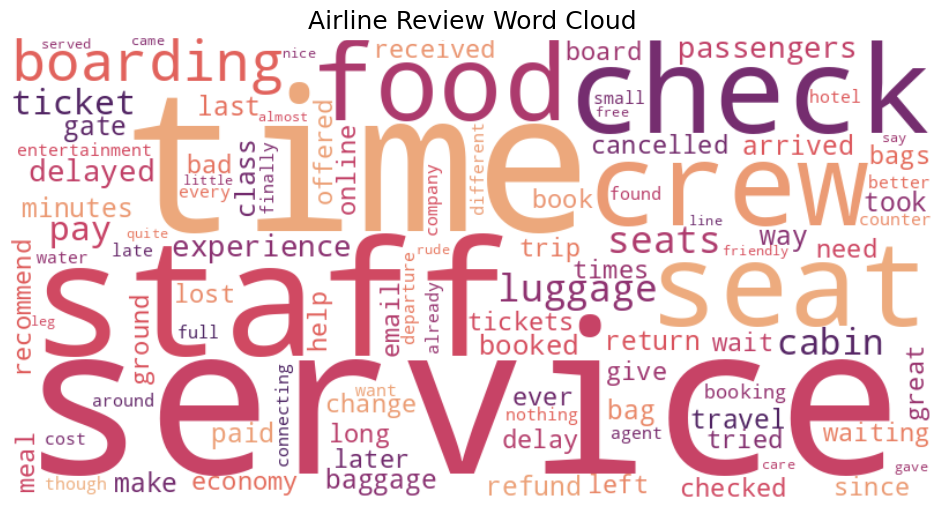

In [ ]:
#Word Cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,
    colormap='flare',
    collocations=False,
    max_words=100
).generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Airline Review Word Cloud', fontsize=18, color='black', backgroundcolor='white')
plt.show()

**From the word cloud, we were able to interpret that:**

* The most frequently mentioned keywords, such as 'service,' 'staff,' and 'seat,' are closely related to the given performance categories, which further solidifies their importance.

* Time-related words like 'time,' 'delayed,' 'minute,' 'late,' and 'long' also appeared frequently, indicating that customers are particularly sensitive to timing and delays.

* Price-related words like 'ticket', 'pay' and 'refund' were also frequent, emphasizing importance for value for money.


From the key driver analysis, we noticed that value for money is the factor impacting overall ratings the most. Since different types of travelers have varying value systems, this factor may be perceived differently across segments. Airlines need to create value for money specifically for each customer segment, which is why we decided to study segmented patterns in the data.

## 3.2 Customer Segment and Trend Analysis

For this, we begin by aiming to observe the distribution of the segments.

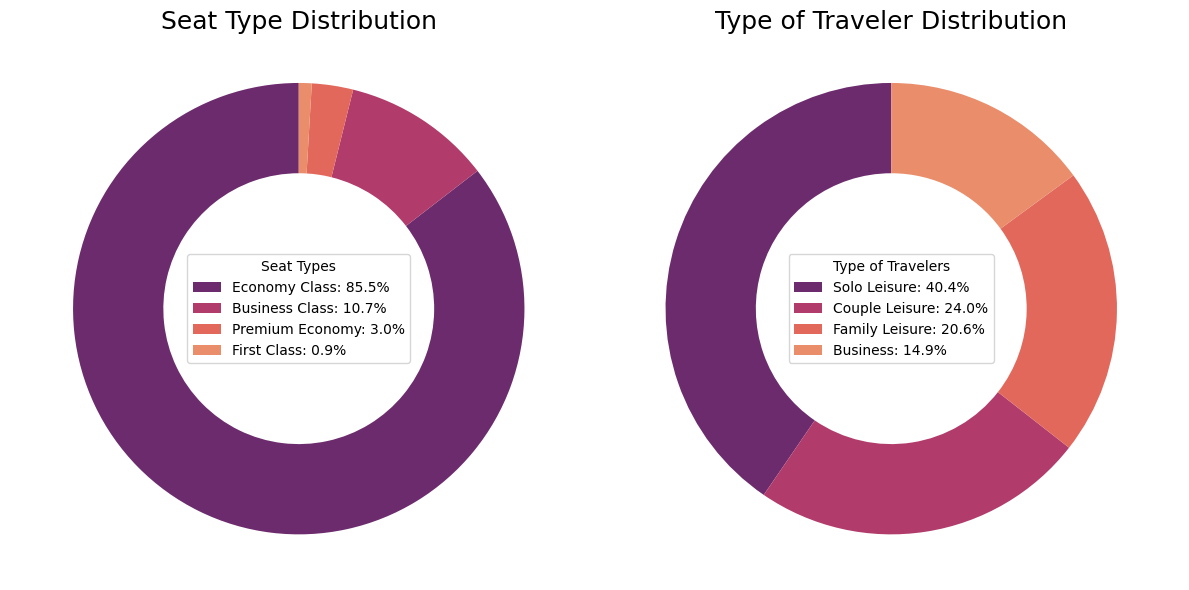

In [ ]:
#Calculating the count of each categories
seat_type_count = airline_review_final['seat_type'].value_counts()
traveler_type_count = airline_review_final['type_of_traveler'].value_counts()

#Creating a figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
color_palette = ['#6c2b6d','#b13c6c','#e3685c','#e98d6b']

#Pie chart for Seat Type
axes[0].pie(seat_type_count, colors=color_palette, startangle=90, wedgeprops={'width':0.4})
axes[0].axis('equal')
axes[0].set_title('Seat Type Distribution', fontsize=18)
percentages = 100 * seat_type_count / seat_type_count.sum()
legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(seat_type_count.index, percentages)]
axes[0].legend(legend_labels, title="Seat Types", loc="center")

#Pie chart for Type of Traveler
axes[1].pie(traveler_type_count, colors=color_palette, startangle=90, wedgeprops={'width':0.4})
axes[1].axis('equal')
axes[1].set_title('Type of Traveler Distribution', fontsize=18)
percentages = 100 * traveler_type_count / traveler_type_count.sum()
legend_labels = [f'{label}: {percentage:.1f}%' for label, percentage in zip(traveler_type_count.index, percentages)]
axes[1].legend(legend_labels, title="Type of Travelers", loc="center")

plt.tight_layout()
plt.show()

**The two pie charts show that:**

* The seat type distribution shows 'Economy Class' dominating the chart, followed by 'Business', 'Premium Economy', and 'First.' This aligns well with the actual ratio based on the number of passengers in each seat class within airlines, implying that the data is not skewed and does not reflect any unexpected patterns in this segment.

* Solo leisure travelers account for the largest share, followed by family and couple leisure travelers, while business travelers make up the smallest percentage. Contrary to common assumptions that group or business travel is more frequent, solo leisure travel is the most dominant category.

As the composition ratio shown in the 'Type of Traveler' does not follow assumed trends, we decided to explore this segment further in our analysis. To do this, we will compare overall ratings with ratio of recommendations.

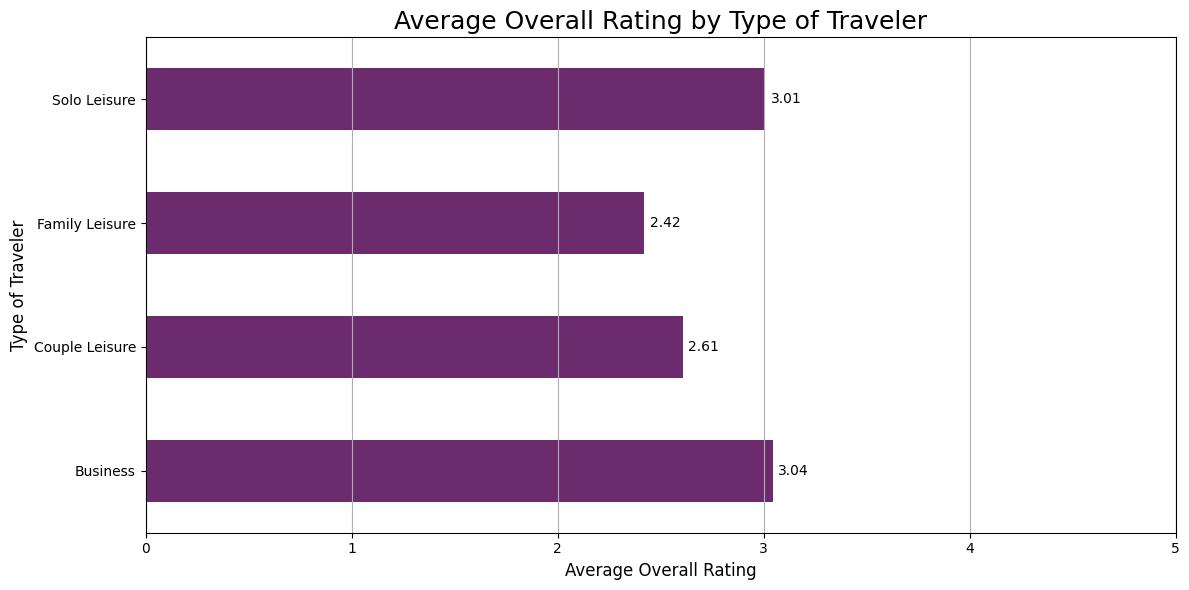

In [ ]:
#Convert 'overall_rating' to numeric value and get the mean by 'type_of_traveler'
airline_review_final['overall_rating'] = pd.to_numeric(airline_review_final['overall_rating'], errors='coerce')
overall_rating_by_traveler = airline_review_final.groupby('type_of_traveler')['overall_rating'].mean()

#Visualization: 1st Chart
fig, ax1 = plt.subplots(figsize=(12, 6))
overall_rating_by_traveler.plot(kind='barh', color='#6c2b6d', ax=ax1)
ax1.set_title('Average Overall Rating by Type of Traveler', fontsize = 18)
ax1.set_xlabel('Average Overall Rating', fontsize = 12)
ax1.set_ylabel('Type of Traveler', fontsize = 12)
ax1.set_xlim(0, 5)
ax1.grid(True, axis='x')

for i in ax1.patches:
    ax1.text(i.get_width() + 0.1, i.get_y() + i.get_height() / 2,
             f'{i.get_width():.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

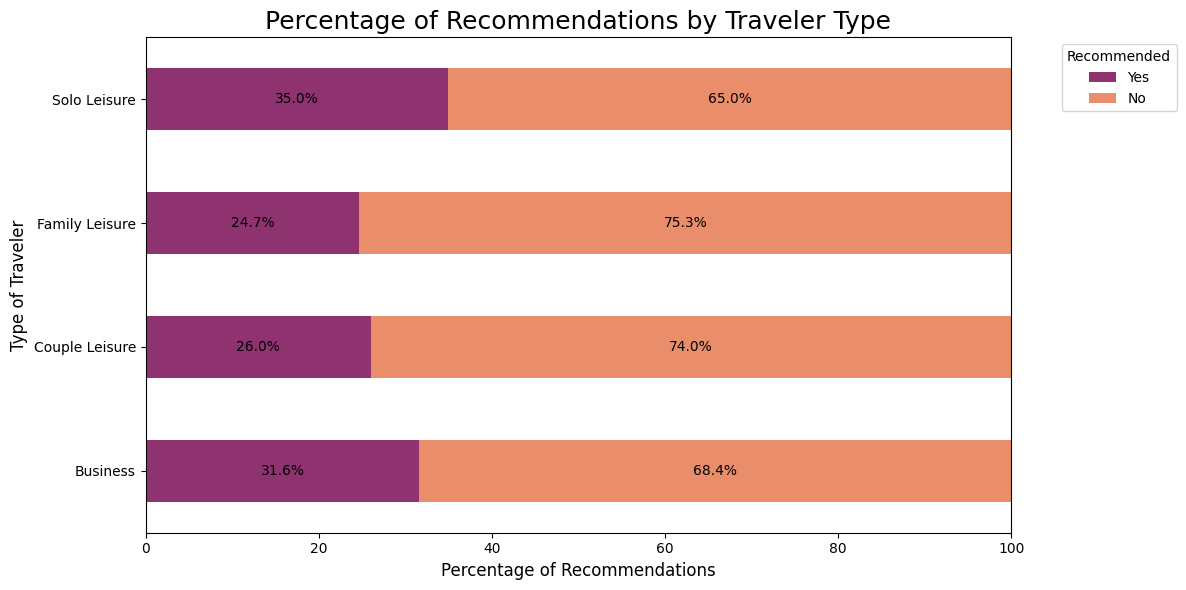

In [ ]:
#Create count variables
traveler_recommendation_counts = airline_review_final.groupby(['type_of_traveler', 'recommended']).size().unstack().fillna(0)

#Set order
traveler_recommendation_counts = traveler_recommendation_counts[['yes', 'no']]

#Calculate percentage
traveler_recommendation_percentage = traveler_recommendation_counts.div(traveler_recommendation_counts.sum(axis=1), axis=0) * 100

#Visualization
fig, ax2 = plt.subplots(figsize=(12, 6))

traveler_recommendation_percentage.plot(kind='barh', stacked=True, ax=ax2, color=['#8f3370', '#e98d6b'])

ax2.set_title('Percentage of Recommendations by Traveler Type', fontsize=18)
ax2.set_xlabel('Percentage of Recommendations', fontsize = 12)
ax2.set_ylabel('Type of Traveler', fontsize = 12)

ax2.legend(title='Recommended', labels=['Yes', 'No'], bbox_to_anchor=(1.05, 1))
ax2.set_xlim(0, 100)

for bars in ax2.containers:
    ax2.bar_label(bars, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

**From the two bar charts, we observed that:**

* Business travelers had the highest average overall ratings, with the solo leisure type following closely behind, showing only a slight difference.

* In the recommendations distribution, it can be seen that percentage of positive recommendations is low for all categories.

* We note that solo leisure travelers have a higher rate of approvals compared to the business travelers.

This indicates an inconsistency between the two groups: while business travelers rated the airlines highly, they were less likely to recommend them compared to solo leisure travelers.


Further, we aimed to answer the question, "How do the factors influence passenger satisfaction across different types of travelers?"

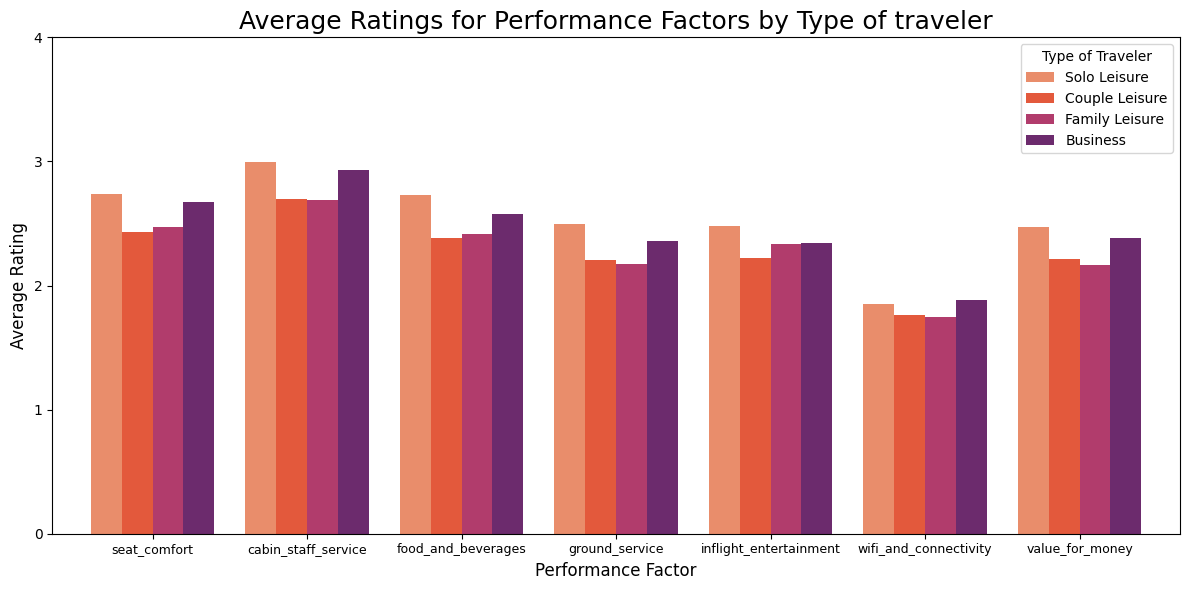

In [ ]:
#Group by Seat Type and calculate the mean for performance columns
seat_type_ratings = airline_review_final.groupby('type_of_traveler').mean(numeric_only=True)[performance_columns]

seat_type_order = ['Solo Leisure', 'Couple Leisure', 'Family Leisure', 'Business']

#Reorder the rows of the DataFrame according to the seat type order
seat_type_ratings = seat_type_ratings.loc[seat_type_order]
colors_S= ['#e98d6b','#E3593C','#b13c6c','#6c2b6d']

#Visualization
seat_type_ratings.T.plot(kind='bar', figsize=(12, 6), width=0.8, color = colors_S)

plt.title('Average Ratings for Performance Factors by Type of traveler', fontsize=18)
plt.xlabel('Performance Factor', fontsize = 12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=0, fontsize = 9)
plt.yticks(np.arange(0, 5, 1))
plt.ylim(0, 4)
plt.legend(title='Type of Traveler', loc='best')

plt.tight_layout()
plt.show()

**This chart shows that:**

* The ratings across the different 'Types of Traveler' do not exhibit significant variations, indicating a relatively consistent level of satisfaction across traveler segments.

* However, solo leisure travelers rate higher than others, suggesting they are more satisfied with their experiences, in contrast to couple and family leisure travelers, who have consistently lower ratings.

* Business travelers value Wi-Fi and Connectivity most, which is likely due to their need to stay connected and work during flights.

Continuing the exploration of passenger trends, we now move on from segments, to understanding the patterns of overall ratings over time.

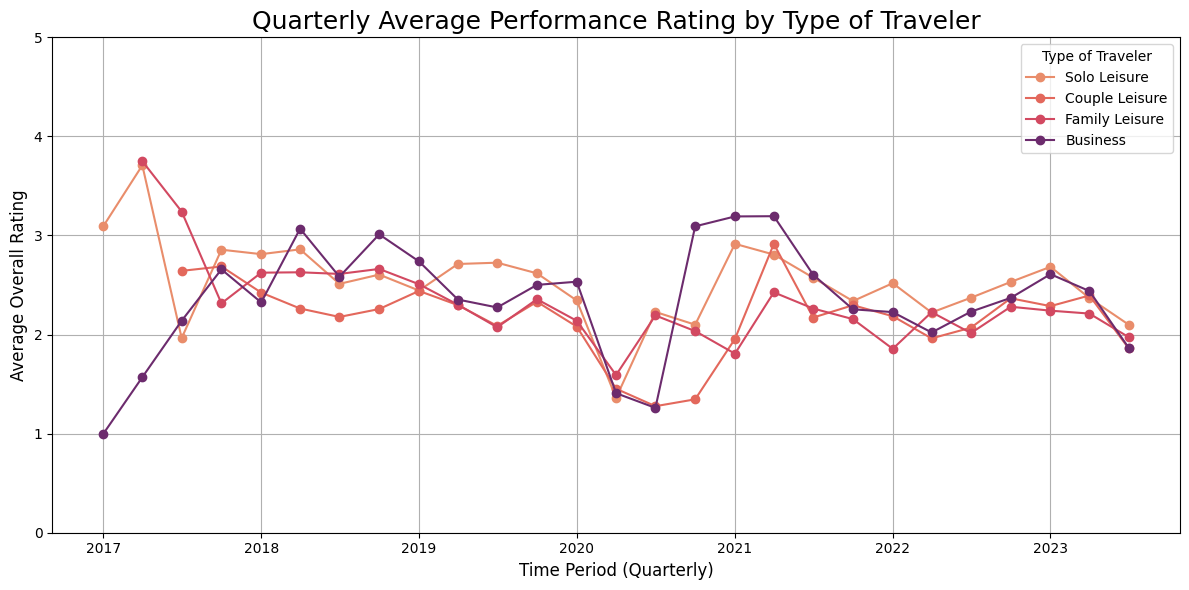

In [ ]:
#Add Average Performance Rating column
airline_review_final['average_performance_rating'] = airline_review_final[performance_columns].mean(axis=1)

#Group by 'type_of_traveler' and 'date_flown' quarter to calculate the average overall rating per quarter
monthly_avg_rating_by_traveler_type = airline_review_final.groupby([airline_review_final['type_of_traveler'], airline_review_final['date_flown'].dt.to_period('Q')])['average_performance_rating'].mean().unstack(level=0)

#Interpolate missing values to ensure smooth line connection (for business travelers)
monthly_avg_rating_by_traveler_type = monthly_avg_rating_by_traveler_type.interpolate()

#Assigning colors
colors = {
    'Solo Leisure': '#e98d6b',
    'Couple Leisure': '#e3685c',
    'Family Leisure': '#d24961',
    'Business': '#6c2b6d'
}

#Setting order
legend_order = ['Solo Leisure', 'Couple Leisure', 'Family Leisure', 'Business']

#Visualization
plt.figure(figsize=(12, 6))

for traveler_type in legend_order:
    plt.plot(monthly_avg_rating_by_traveler_type.index.to_timestamp(), monthly_avg_rating_by_traveler_type[traveler_type], label=traveler_type, marker='o', color=colors[traveler_type])

plt.title('Quarterly Average Performance Rating by Type of Traveler', fontsize = 18)
plt.xlabel('Time Period (Quarterly)', fontsize = 12)
plt.ylabel('Average Overall Rating', fontsize = 12)
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Type of Traveler')
plt.ylim(0, 5)

plt.tight_layout()
plt.show()

**This trend analysis shows that:**

* The graph shows that, except for the COVID period dip, the ratings for all categories stay within a similar range.

* Ratings for most categories spiked quickly rather than showing a gradual rise. This may be attributed to lower traveler expectations or improved service quality from airlines due to reduced travel demand.

* Another significant observation is that during this period, ratings stayed low for family travelers while they rose for the other three. This could be due to higher service expectations regarding family safety.

* Business travelers' ratings show the most variation, implying their satisfaction is impacted by events arounds them. They peak highest after the COVID dip, but soon fall back as well.

Further, we wanted to explore this in relation to the volume of travelers.

<ipython-input-31-360cc28617ca>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_flare = cm.get_cmap('flare', 5)


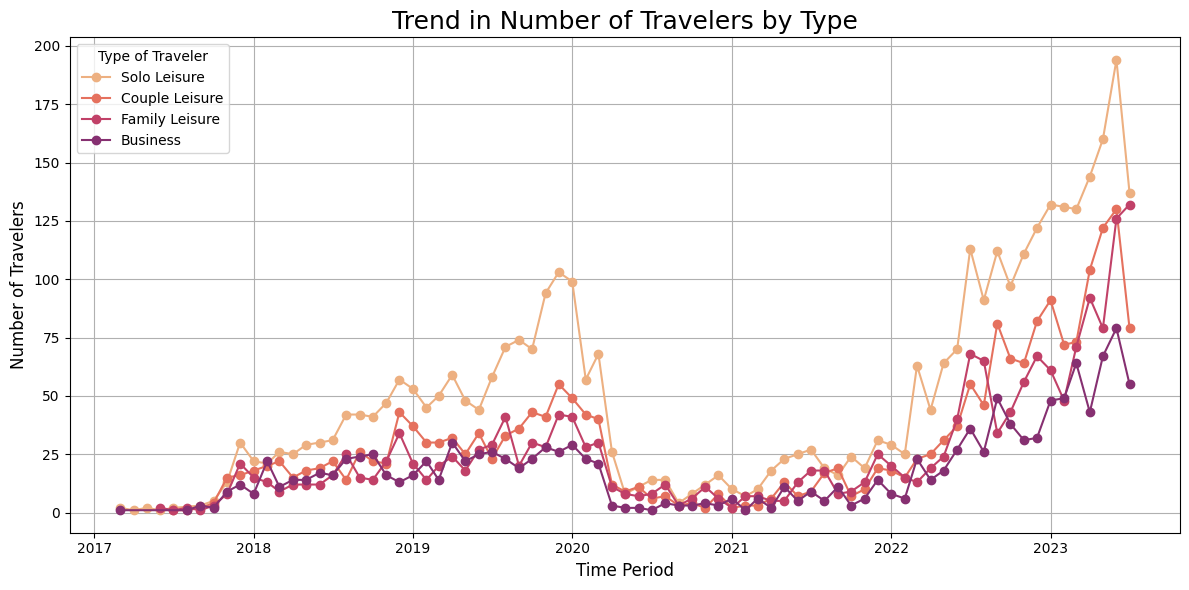

In [ ]:
#Define the number of unique travelers
traveler_counts = airline_review_final.groupby(['date_flown', 'type_of_traveler']).size().reset_index(name='count')
num_travelers = len(traveler_counts['type_of_traveler'].unique())

#Create a colormap
colors_flare = cm.get_cmap('flare', 5)

#Visualization
plt.figure(figsize = (12, 6))

for i, traveler in enumerate(legend_order):
    subset = traveler_counts[traveler_counts['type_of_traveler'] == traveler]
    plt.plot(subset['date_flown'], subset['count'], marker = 'o', label = traveler, color = colors_flare(i))

plt.title('Trend in Number of Travelers by Type', fontsize = 18)
plt.xlabel('Time Period', fontsize = 12)
plt.ylabel('Number of Travelers', fontsize = 12)
plt.xticks(rotation = 0)
plt.legend(title = 'Type of Traveler')
plt.grid()
plt.tight_layout()
plt.show()

**The line chart shows that:**

* It is clear that solo travelers dominate with the highest volatility. Couple leisure travelers follows closely with more stability, while family travelers show steadier and consistent growth despite lower numbers. Business travelers are most consistent, seemingly unaffected by the time or seasons.

* While the chart may overrepresent leisure travelers, particularly solo travelers who tend to share more about their experiences, it still reveals trends applicable to the general population.

* The graph displays the impact of COVID-19, with travel numbers plummeting close to zero after 2020. Post-pandemic, there's a significant rise, with a peak across all categories in mid-2023, indicating a surge in travel demand.



During the individual airline comparison, we noticed airlines from certain regions performing better. As a result, we decided to conduct a more specific geo-spatial analysis.

## 3.3 Flight Type and Regional Analysis

Here, we plan to analyze the differences in ratings by region, starting with an examination of customer satisfaction by comparing international and domestic flights.

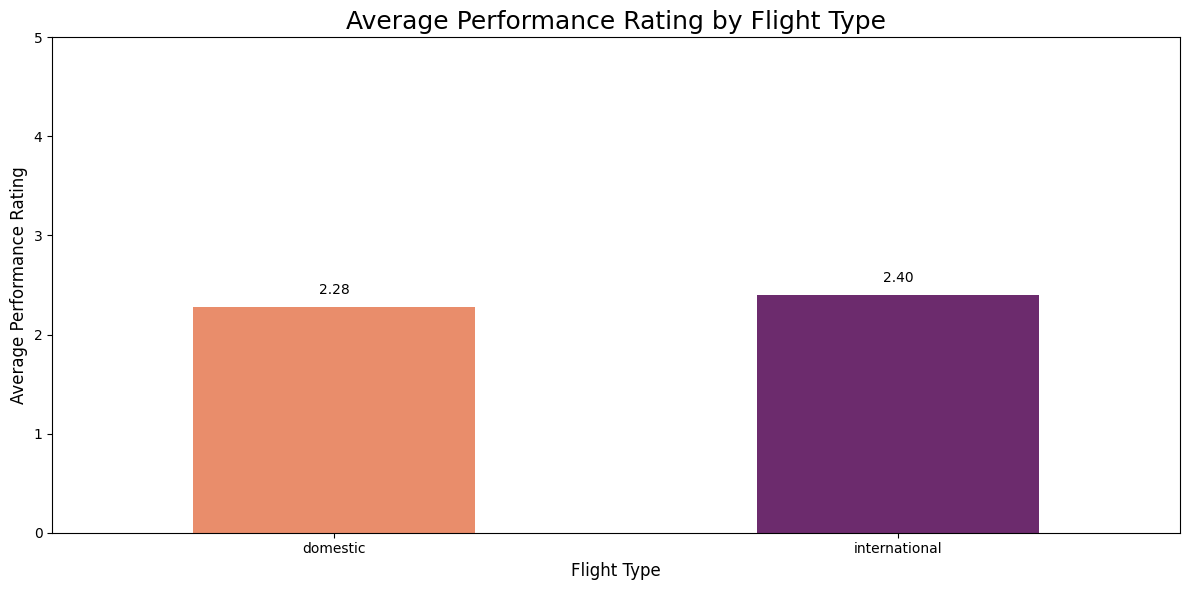

In [ ]:
#Calculating the average performance ratings
airline_review_final['average_performance_rating'] = airline_review_final[performance_columns].mean(axis=1)

#Visualization
fig, ax1 = plt.subplots(figsize=(12, 6))
avg_rating_cleaned = airline_review_final.groupby('flight')['average_performance_rating'].mean()
avg_rating_cleaned.plot(kind='bar', ax=ax1, color=['#e98d6b', '#6c2b6d'])
ax1.set_title('Average Performance Rating by Flight Type', fontsize = 18)
ax1.set_ylabel('Average Performance Rating', fontsize = 12)
ax1.set_xlabel('Flight Type', fontsize = 12)
ax1.set_xticks(range(len(avg_rating_cleaned.index)))
ax1.set_xticklabels(avg_rating_cleaned.index, rotation=0)
ax1.set_ylim(0, 5)

for i in ax1.patches:
    ax1.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1,
             f'{i.get_height():.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
#Prepare data
avg_columns_cleaned = airline_review_final.groupby('flight')[performance_columns].mean()

#Change Order
flight_order = ['domestic', 'international']
avg_columns_cleaned = avg_columns_cleaned.reindex(flight_order)
categories = avg_columns_cleaned.columns.tolist()

#Customize colors
colors = {
    'domestic': {'line': '#e98d6b', 'fill': 'rgba(233, 141, 107, 0.3)'},
    'international': {'line': '#8f3370', 'fill': 'rgba(177, 60, 108, 0.2)'}
}

#Create Spider chart
fig = go.Figure()

for flight_type in avg_columns_cleaned.index:
    fig.add_trace(go.Scatterpolar(
        r=avg_columns_cleaned.loc[flight_type].tolist(),
        theta=categories,
        fill='toself',
        name=flight_type,
        line=dict(color=colors[flight_type]['line']),
        fillcolor=colors[flight_type]['fill']
    ))

#Adjust chart size and title font size, and center the title
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 5], tickvals=[1, 2, 3, 4, 5])
    ),
    showlegend=True,
    title={
        'text': "Radar Chart of Average Ratings by Flight Type",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font=dict(size=18),
    width=1200,
    height=600
)

fig.show()

**The charts show that:**

* The average performance rating for international flights is slightly higher than that of domestic flights, but the difference is not significant.

* However, when examining the differences across individual categories, a significant gap in inflight entertainment between the two flight types can be noted, likely due to seatback screens being more common on international flights than on domestic ones.

* Despite the overall performance advantages for international flights, value for money is rated similarly across both domestic and international flights, suggesting passengers may find both types of flights reasonably priced for the services provided.

We analyzed how ratings vary for these two types of flights and now want to further explore the differences between them over time.

<ipython-input-34-7f80d56201b5>:11: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



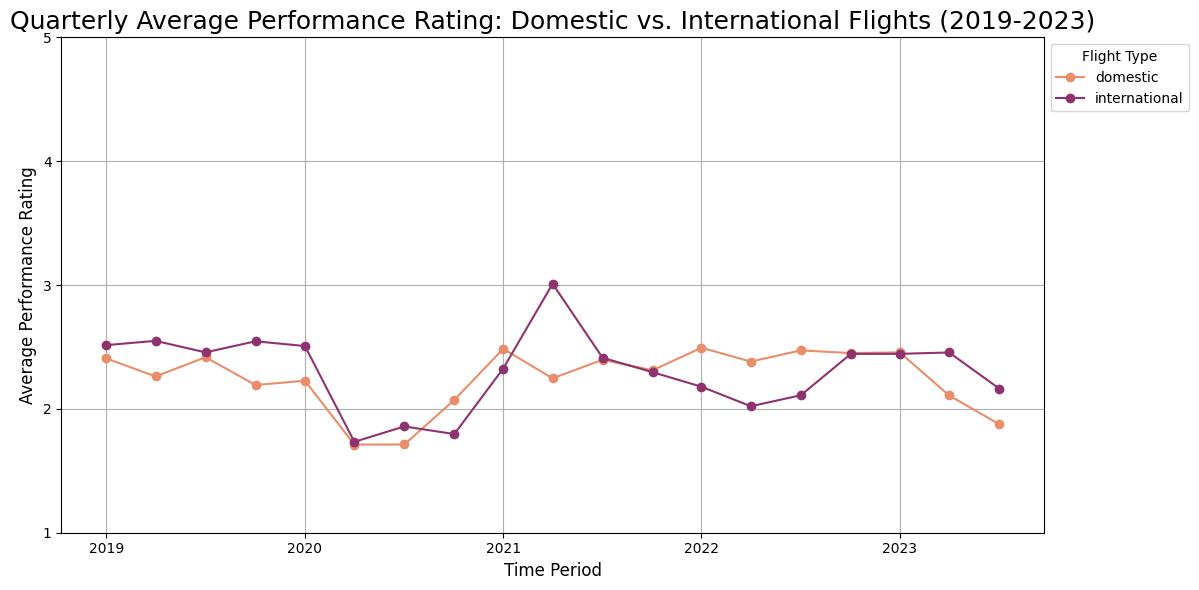

In [ ]:
#Convert data type
airline_review_final['review_date'] = pd.to_datetime(airline_review_final['review_date'], errors='coerce')
airline_review_final['average_performance_rating'] = pd.to_numeric(airline_review_final['average_performance_rating'], errors='coerce')

#Filter data from 2019 to 2023
airline_review_final_filtered = airline_review_final.dropna(subset=['review_date', 'average_performance_rating'])
airline_review_final_filtered = airline_review_final_filtered[(airline_review_final_filtered['review_date'].dt.year >= 2019) &
                                                              (airline_review_final_filtered['review_date'].dt.year <= 2023)]

#Group by flight type and quarterly
rating_by_flight_type = airline_review_final_filtered.groupby(['flight', pd.Grouper(key='review_date', freq='Q')]).agg(
    avg_rating=('average_performance_rating', 'mean'),
    num_reviews=('average_performance_rating', 'size')
).reset_index()

#Pivot
rating_pivot = rating_by_flight_type.pivot(index='review_date', columns='flight', values='avg_rating')

#Visualization
plt.figure(figsize=(12, 6))

#Define colors
color_map = {'domestic': '#e98d6b', 'international': '#8f3370'}

for flight_type in rating_pivot.columns:
    plt.plot(rating_pivot.index, rating_pivot[flight_type], marker='o', label=flight_type, color=color_map[flight_type])

#Set title and labels
plt.title('Quarterly Average Performance Rating: Domestic vs. International Flights (2019-2023)', fontsize=18)
plt.ylabel('Average Performance Rating', fontsize = 12)
plt.xlabel('Time Period', fontsize = 12)
plt.yticks([1, 2, 3, 4, 5])

xticks_positions = rating_pivot.index[rating_pivot.index.quarter == 1]
plt.xticks(xticks_positions, xticks_positions.strftime('%Y'), rotation=0)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Flight Type')
plt.grid(True)
plt.tight_layout()
plt.show()

**This line chart shows that:**

* For most of the period, international flights perform better than domestic flights, especially peaking in the post COVID quarters.

* After mid-2021, international flights' ratings started declining, overlapping with domestic ones for a quarter and then performing lower than domestic for the year of 2022.

* Domestic airlines, on the other hand, showed relatively more consistent performance, especially from mid-2021 to end of 2022.

* In 2023, both domestic and international ratings started declining. This could be attributed to increased travel demand outpacing operational capacity, thus affecting service quality.

Based on the flight-haul type, we examined whether there are differences in average satisfaction ratings depending on the region.

In [ ]:
#Get a dataframe for domestic and international
domestic_df = airline_review_final[airline_review_final['flight'] == 'domestic'].groupby('departure_country')['average_performance_rating'].mean().reset_index()
international_df = airline_review_final[airline_review_final['flight'] == 'international'].groupby('departure_country')['average_performance_rating'].mean().reset_index()

#Rename columns for clarity
domestic_df.columns = ['Country', 'Domestic_Performance']
international_df.columns = ['Country', 'International_Performance']

#Define the custom 'flare' color palette
flare_colorscale = [
    [1.0, '#e98d6b'],
    [0.8, '#e3685c'],
    [0.6, '#d24961'],
    [0.4, '#b13c6c'],
    [0.2, '#8f3370'],
    [0.0, '#6c2b6d'],
]

#Visualizations
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Domestic Performance", "International Performance"),
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}]]
)

fig.add_trace(
    go.Choropleth(
        locations=domestic_df['Country'],
        locationmode='country names',
        z=domestic_df['Domestic_Performance'],
        colorscale=flare_colorscale,
        colorbar=dict(
            title="Performance",
            len=0.75,
            x=1.1,
        ),
        showscale=True,
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Choropleth(
        locations=international_df['Country'],
        locationmode='country names',
        z=international_df['International_Performance'],
        colorscale=flare_colorscale,
        showscale=False,
        name="International Performance",
    ),
    row=1, col=2
)

fig.update_geos(
    showframe=True,
    framecolor="black",
    row=1, col=1
)

fig.update_layout(
    title={
        'text': "Average Performance by Country (Domestic vs International)",
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'y': 0.95
    },
    title_font=dict(size=18),
    geo=dict(showcoastlines=False, projection_type='equirectangular'),
    width=1200,
    height=650,
    margin=dict(l=50, r=50, t=100, b=50),
)

fig.show()

**These regional maps show that:**

* Asian countries display better performance in both international and domestic flights, especially China and Kazakhstan, emerging as high performers.

* One discovery is the contrast in performance for North America and Europe. Europe tends to do better in domestic flights than international ones, while the scenario is exactly opposite for North America.

* The visual suggests that domestic flights typically receive higher ratings than international flights, which contradicts the previous analysis. This could be attributed to higher concentration of international flight data.

# **4. Conclusion**

The analysis revealed that all key service drivers showed mediocre performance, indicating room for improvement across multiple dimensions. Correlation analysis highlighted the importance of value for money, which was strongly linked to seat comfort, cabin staff service, food & beverages, and ground service. This reflects the holistic nature of customer evaluations, where multiple service elements shape overall satisfaction. Wi-Fi and in-flight entertainment were common pain points but were less influential in overall ratings.

Segment analysis showed that solo leisure travelers had higher satisfaction, while business travelers, despite giving the highest ratings, were less likely to recommend airlines. This points to a marketing gap, with business travelers needing more personalized loyalty incentives. Solo travelers, dominating in volume, should be targeted with campaigns emphasizing competitive pricing and comfort.

Regionally, Asian airlines outperformed North American and European carriers, particularly in value for money and ground service. Tailored strategies are needed, with high-performing airlines focusing on maintaining market share, and underperforming ones addressing service gaps. Low value-for-money ratings across both domestic and international flights suggest a perception issue, calling for a reassessment of pricing and clearer communication of service value.

Lastly, seasonality affects leisure travelers, while business travel remains stable, necessitating targeted marketing and operational strategies to manage demand fluctuations and enhance customer experience during peak periods. This exploratory project can help airlines identify focus areas and make informed decisions to meet consumer expectations and stay ahead of the curve.

###**Future Steps**

While this study provides a solid foundation for understanding factors affecting customer satisfaction, it is just the beginning. There are several areas for further exploration that could offer valuable insights and competitive advantages for the airline industry. Here are some potential next steps:

* **Case Studies of Top Performing Airlines:** Certain lesser-known airlines, like China Southern Airlines and Volotea, have shown unexpectedly high performance. Conducting in-depth case studies on these airlines can reveal best practices and help create competitive benchmarks, benefiting both top-performing and more well-known brands.

* **Sentiment Analysis:** While we've identified key factors that matter to customers, we haven’t fully explored the tone and context of customer reviews. Sentiment analysis can provide a deeper understanding of consumer emotions, bridging the gap between ratings and recommendations.

* **Pricing Strategy:** Since value for money is a critical factor, analyzing pricing strategies in relation to customer satisfaction could help optimize perceived value and enhance pricing models across the industry.

* **Time-Related Issues and Delays:** Time-related concerns, such as delays and cancellations, are frequently mentioned by customers. Further analysis of these factors could provide airlines with actionable insights to improve customer experiences and, ultimately, satisfaction ratings.

By focusing on these areas, we can unlock deeper insights and drive improvements in customer satisfaction across the airline industry.


### **Challenges**

In our airline review analysis, we encountered several challenges that required thoughtful solutions:

**Data Cleaning:** Many columns contained data in inconsistent formats, which made analysis difficult. We addressed this by implementing standardization rules to merge the data and created new metric columns to enable more detailed analysis. We also reorganized the date columns to ensure they could be used effectively in visualizations, helping us reveal important trends over time.

**Dataset Merging:** Determining the right datasets and merging method posed difficulties, especially due to duplicated entries in the world city data, which prevented a one-to-one join. To resolve this, we filtered out duplicates and focused on cities with the largest populations. This approach helped us uncover regional patterns.

**Visual Clutter:** Visualizations initially were cluttered due to the high volume of data points, making them hard to interpret. We streamlined the variables and data sections, selecting more relevant chart types to present the data more clearly. Additionally, we carefully selected the time period based on the month, quarter and year when analyzing trends over time, ensuring that we highlighted key patterns without losing important insights.

### References

1. [Mohammad Soltanieh-ha, "BA780 - Introduction to Data Anaytics", Colab Notebooks, Fall 2024](https://github.com/soltaniehha/Intro-to-Data-Analytics/tree/main)

2. [Datacamp Modules ](https://app.datacamp.com/learn/assignments)

3. [Best and Worst Airlines According to Consumer Reports Readers](https://www.consumerreports.org/money/airline-travel/best-and-worst-airlines-a1179589302/)

4. [Choropleth Maps in python](https://plotly.com/python/choropleth-maps/)

5. [Examining Factors that Affect Passenger’s Overall Satisfaction and Loyalty: Evidence from Jordan Airport](https://jjmie.hu.edu.jo/vol%208-2/JJMIE-30-13-01.pdf)

6. [Previous Years Projects](https://github.com/soltaniehha/Intro-to-Data-Analytics/tree/main/docs/team-projects)

7. [Seat Class Ratio](https://centreforaviation.com/analysis/reports/flying-with-frills-global-airlines-ranked-by-first-class-and-premium-seat-numbers-655197)

8. [Spider Chart](https://plotly.com/python/radar-chart/)

9. [Chart Ideas and Color Palettes](https://seaborn.pydata.org/generated/seaborn.color_palette.html)

10. [Quarterly Consumer Insights](https://www.ustravel.org/research/quarterly-consumer-insights)

11. [Airline Demand-Supply Imbalance is Good for Revenue, Tough on Customer Experience, Says J.D. Power](https://www.jdpower.com/business/press-releases/2023-north-america-airline-satisfaction-study)

12. [Air Passenger Market Analysis](https://www.iata.org/en/iata-repository/publications/economic-reports/air-passenger-market-analysis-december-2023/)

### Generative AI

In this project, we used generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

- Code Review and Debugging: We used GPT-4o to make our code more efficient, resolve syntax errors and add few components to certain visualisation codes.
- Proofreading and Grammar Checks: We used Grammarly to refine our writing, improve readability, and ensure grammatical accuracy.
-Colormapping: We used ChatGPT to explore available color palettes and how they can be integrated.
-Legend and Title: We used ChatGPT to understand how to bring the legend and title to the center, as they were overlapping.
-Spider Chart: We have learned how to create a spider chart using ChatGPT.

Our team has adhered to academic integrity standards throughout the process, reviewing and validating all AI-generated content to ensure its accuracy.